In [36]:
# cse417T hw1 1.7 part b

import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
from math import e

In [30]:
# function to simulate coin toss a certain number of times and returns number of heads
def coinToss(number):
    recordList, heads, tails = [], 0, 0
    for i in range(number): # do this 'number' amount of times
         flip = random.randint(0, 1)
         if (flip == 0):
              # print("Heads")
              recordList.append("Heads")
              heads += 1
         else:
              # print("Tails")
              recordList.append("Tails")

    return heads

In [49]:
alldiff1 = []
alldiff2 = []
N = 6
mu = 0.5

# compute the difference between error (v) and mu 10000 times to create a distribution of values
for i in range(10000):
  v1 = coinToss(6) / N
  v2 = coinToss(6) / N
  diff1 = abs(v1 - mu)
  diff2 = abs(v2 - mu)
  alldiff1.append(diff1)
  alldiff2.append(diff2)

# take the larger value from each respective index and create a "max" values list
alldiffmax = np.maximum(alldiff1, alldiff2)

In [50]:
epsilon = []
ep_y = []
hoeffding_y = []

# creating 100 values of epsilon
x_val = 0
for i in range(100):
  epsilon.append(x_val)
  x_val += 0.01

# calculate the probability that difference > epsilon at each epsilon
# calculate the hoeffding bound at each epsilon
for ep in epsilon:
  count = 0
  for i in range(len(alldiffmax)):
    if alldiffmax[i] > ep:
      count += 1

  proba = count/10000
  ep_y.append(proba)

  h_y = 4*(e**(-12*(ep**2)))
  hoeffding_y.append(h_y)

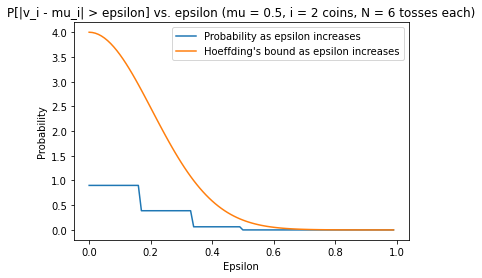

In [51]:
# plot probability and hoeffding bound curves
prob, = plt.plot(epsilon, ep_y)
hoeff_bound, = plt.plot(epsilon, hoeffding_y)
plt.ylabel('Probability')
plt.xlabel('Epsilon')
plt.legend([prob, hoeff_bound], ["Probability as epsilon increases", "Hoeffding's bound as epsilon increases"])
plt.title('P[|v_i - mu_i| > epsilon] vs. epsilon (mu = 0.5, i = 2 coins, N = 6 tosses each)')
plt.show()